### Tran Quoc Long - 14520490

### Bai tap 4

File's contents:
1. Test functions on an image set: test some functions in need
2. Let's get start: homework 4

Dataset:
1. http://www.cs.columbia.edu/CAVE/software/softlib/coil-20.php
2. http://benchmark.ini.rub.de/?section=gtsrb&subsection=news

### Using HOG - sklearn

In brief, a HOG descriptor is computed by calculating image gradients that capture contour and silhouette information of grayscale images.
Compute a Histogram of Oriented Gradients (HOG) by:
1. (optional) global image normalization
2. computing the gradient image in x and y
3. computing gradient histograms
4. normalizing across blocks
5. flattening into a feature vector


read more and go to details at: https://www.learnopencv.com/histogram-of-oriented-gradients/

### Test functions on an image set

In [1]:
#import libs
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg


In [2]:
#import scikit-learn
from sklearn import metrics
from sklearn.cluster import KMeans, spectral_clustering, DBSCAN, AgglomerativeClustering
from sklearn.datasets import load_digits
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.datasets import load_iris

from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler

from skimage.feature import ORB, hog
import cv2
from skimage import data, color, exposure

In [3]:
# C:\Users\tranq\Desktop\Thay Duy\GTSRB_Final_Test_Images\GTSRB\Final_Test\Images

In [4]:

# using traffic test dataset from: http://benchmark.ini.rub.de/?section=gtsrb&subsection=news

import glob
file_list = glob.glob('C:/Users/tranq/Desktop/Thay Duy/GTSRB_Final_Test_Images/GTSRB/Final_Test/Images/*.ppm')

In [5]:
print(len(file_list))

12630


In [6]:
#load image and convert into gray image
gray_sample = cv2.imread(file_list[0], 0)

In [7]:
print(gray_sample.shape)
print(gray_sample)

(54, 53)
[[135 135 134 ..., 106  98  79]
 [140 137 135 ..., 139 136 134]
 [139 135 136 ..., 138 136 137]
 ..., 
 [134 133 132 ..., 134 135 135]
 [132 132 130 ..., 134 135 135]
 [132 130 131 ..., 136 136 136]]


c:\users\tranq\appdata\local\programs\python\python36\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


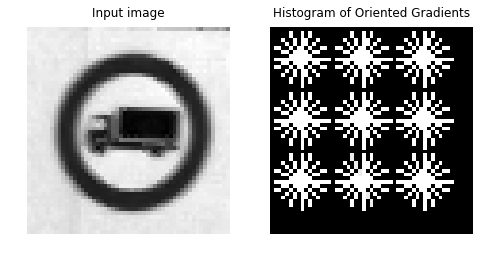

In [8]:
fd, hog_image = hog(gray_sample, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualise=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(gray_sample, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax1.set_adjustable('box-forced')
plt.show()

In [20]:
print(hog_image.shape)

(54, 53)


In [21]:
print(hog_image)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [22]:
print(fd)

[ 0.07542413  0.44819084  0.27551272  0.03819493  0.06649688  0.03082425
  0.04924103  0.01611286  0.00806231  0.00436093  0.31948913  0.35425726
  0.2932615   0.00553158  0.01211024  0.00292633  0.01193268  0.00847274
  0.01228219  0.06401994  0.27005266  0.46631976  0.16514645  0.0017728
  0.41759222  0.27204966  0.01246415  0.00794486  0.00739411  0.00348958
  0.02366572  0.25539889  0.08271567  0.11182527  0.09531267  0.18312603
  0.38925493  0.04878819  0.04722842  0.0417482   0.23753768  0.02987339
  0.01314065  0.02004655  0.21169811  0.03251646  0.22866156  0.22652508
  0.03441434  0.00783541  0.00625825  0.00656823  0.01382613  0.14487574
  0.53099973  0.25522103  0.0053551   0.01479662  0.0354136   0.20714963
  0.35470584  0.30839348  0.07305928  0.00112584  0.09747449  0.33413911
  0.37982689  0.10942635  0.05235092  0.01127933  0.01217518  0.00332716]


In [23]:
print(fd.shape)

(72,)


In [24]:
gray_sample = cv2.imread(file_list[1], 0)
fd, hog_image = hog(gray_sample, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualise=True)
print(fd)

[ 0.19251596  0.3057704   0.21901283  0.03726348  0.01166032  0.01499944
  0.01677023  0.20200677  0.03730958  0.01144912  0.02510078  0.15047019
  0.25345538  0.33599621  0.11425506  0.07196326  0.27128523  0.10601961
  0.05940887  0.07249194  0.08673583  0.08408472  0.07435032  0.24562313
  0.1802568   0.12948743  0.06567273  0.04574295  0.03951589  0.08881841
  0.1267734   0.32373223]


c:\users\tranq\appdata\local\programs\python\python36\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [25]:
print(fd.shape)
print(fd)

(32,)
[ 0.19251596  0.3057704   0.21901283  0.03726348  0.01166032  0.01499944
  0.01677023  0.20200677  0.03730958  0.01144912  0.02510078  0.15047019
  0.25345538  0.33599621  0.11425506  0.07196326  0.27128523  0.10601961
  0.05940887  0.07249194  0.08673583  0.08408472  0.07435032  0.24562313
  0.1802568   0.12948743  0.06567273  0.04574295  0.03951589  0.08881841
  0.1267734   0.32373223]


In [26]:
gray_sample = cv2.imread(file_list[2], 0)
fd, hog_image = hog(gray_sample, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualise=True)
print(fd)
print(fd.shape)

[ 0.01668818  0.06060829  0.13054904  0.21150763  0.46377098  0.07275872
  0.02880035  0.01531532  0.00391811  0.01160133  0.10774882  0.23004025
  0.51640807  0.11568835  0.0138387   0.00075542  0.01146333  0.002967
  0.01736676  0.08170671  0.19700363  0.47111679  0.19943599  0.01893866
  0.12400235  0.07941266  0.03533826  0.06807628  0.1124205   0.23207429
  0.19938632  0.14928879  0.06997961  0.01520588  0.03011032  0.02136434
  0.04822098  0.06475232  0.74242242  0.00794362  0.25081311  0.01661556
  0.02625111  0.03687919  0.0467513   0.09225051  0.18832367  0.34211485
  0.05102435  0.02835034  0.07654314  0.05856553  0.28543881  0.28472358
  0.17504065  0.04031307  0.05341589  0.0584742   0.03810391  0.19479186
  0.39542891  0.15310522  0.07664903  0.0300305   0.25216953  0.13031281
  0.11327148  0.24852658  0.14953921  0.032318    0.03719213  0.03666936]
(72,)


c:\users\tranq\appdata\local\programs\python\python36\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [28]:
gray_sample = cv2.imread(file_list[3], 0)
fd, hog_image = hog(gray_sample, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualise=True)
print(fd)
print(cv2.imread(file_list[3], 0).shape)
print(cv2.imread(file_list[4], 0).shape)
print(cv2.imread(file_list[5], 0).shape)
print(cv2.imread(file_list[6], 0).shape)
print(cv2.imread(file_list[7], 0).shape)
print(cv2.imread(file_list[8], 0).shape)
print(cv2.imread(file_list[9], 0).shape)

[ 0.12876587  0.17094845  0.18110611  0.14761291  0.10575664  0.07341477
  0.10465705  0.08773796]
(29, 27)
(57, 60)
(56, 52)
(130, 147)
(33, 32)
(50, 45)
(86, 81)


c:\users\tranq\appdata\local\programs\python\python36\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


### =>> We need to resize images into the samesize

### Let's get start

In [1]:
#import libs
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg

#import scikit-learn
from sklearn import metrics
from sklearn.cluster import KMeans, spectral_clustering, DBSCAN, AgglomerativeClustering
from sklearn.datasets import load_digits
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_lfw_people
from sklearn.preprocessing import StandardScaler

from skimage.feature import ORB, hog
from skimage import data, color, exposure
import cv2

### Get all paths of images

In [2]:
# using Columbia University Image Library (COIL-20) data from: http://benchmark.ini.rub.de/?section=gtsrb&subsection=news
import glob
file_list = glob.glob('C:/Users/tranq/Desktop/Thay Duy/coil_20_proc/coil_20_proc/*.png')
print('Total images: ', len(file_list))

Total images:  1440


In [3]:
#load image, resize them into the same size, and convert into greyscale 
def load_image_and_pre_processing(image_path):
    gray_img = cv2.imread(image_path, 0)
    #gray_img = cv2.resize(gray_img,(20,20))
    return gray_img   

In [4]:
# input: list of file paths
# output: data - list of hog_vectors
def HOG_data_measurement(file_list_):
    data = []
    for path in file_list:
        grey_img = load_image_and_pre_processing(path)
        hog_data,hog_image = hog(grey_img, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(1, 1), visualise=True)
        data.append(hog_data)
    return data

In [5]:
data = HOG_data_measurement(file_list)

c:\users\tranq\appdata\local\programs\python\python36\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


## Clustering

In [6]:
#Kmeans
nClusters = 20
t0 = time()
kmeans_model = KMeans(nClusters)
t_kmeans = time()- t0
labels_kmeans = kmeans_model.fit_predict(data)

In [7]:
#Spectral_clustering
t0 = time()
graph = cosine_similarity(data)
t_spectral = time()- t0
labels_spectral = spectral_clustering(graph, n_clusters=20)

In [8]:
#DBSCAN
t0 = time()
data = StandardScaler().fit_transform(data)
labels_dbscan = DBSCAN(eps=0.3, min_samples=1,algorithm='kd_tree').fit_predict(data)
t_dbscan = time()- t0

In [9]:
#Agglomerative Clustering
t0 = time()
Agglomerative_model = AgglomerativeClustering(n_clusters = nClusters)
labels_AgglomerativeClustering = Agglomerative_model.fit_predict(data)
t_agg = time() - t0

## Visulization

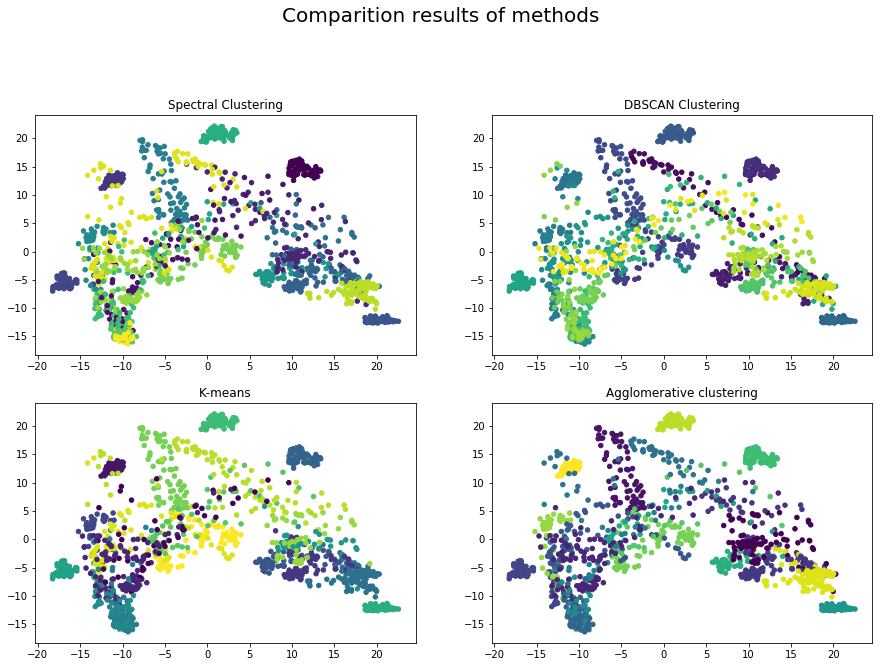

In [10]:
from sklearn.decomposition import PCA
%matplotlib inline
nComponents = 2
vPCA = PCA(nComponents)
digitData_to_2D = vPCA.fit_transform(data)

fig = plt.figure(figsize=(15,15))
fig.suptitle('Comparition results of methods', fontsize=20)

ax = fig.add_subplot(3,2,1)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_spectral, s=20)
ax.set_title('Spectral Clustering')

ax = fig.add_subplot(3,2,2)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_dbscan, s=20)
ax.set_title('DBSCAN Clustering')

ax = fig.add_subplot(3,2,3)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_kmeans, s=20)
ax.set_title('K-means')

ax = fig.add_subplot(3,2,4)
plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= labels_AgglomerativeClustering, s=20)
ax.set_title('Agglomerative clustering')

# ax = fig.add_subplot(3,2,5)
# plt.scatter(digitData_to_2D[:,0], digitData_to_2D[:,1],  c= lfw_people.target, s=20)
# ax.set_title('Target Result')


### References

1. http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html
2. https://www.learnopencv.com/histogram-of-oriented-gradients/

Dataset:
1. http://www.cs.columbia.edu/CAVE/software/softlib/coil-20.php
2. http://benchmark.ini.rub.de/?section=gtsrb&subsection=news